# Overview
In this competition, you’ll develop an NLP model driven by ML to accurately predict the affinity between misconceptions and incorrect answers (distractors) in multiple-choice questions. This solution will suggest candidate misconceptions for distractors, making it easier for expert human teachers to tag distractors with misconceptions.

# Description
A Diagnostic Question is a multiple-choice question with four options: one correct answer and three distractors (incorrect answers). Each distractor is carefully crafted to capture a specific misconception. For example:

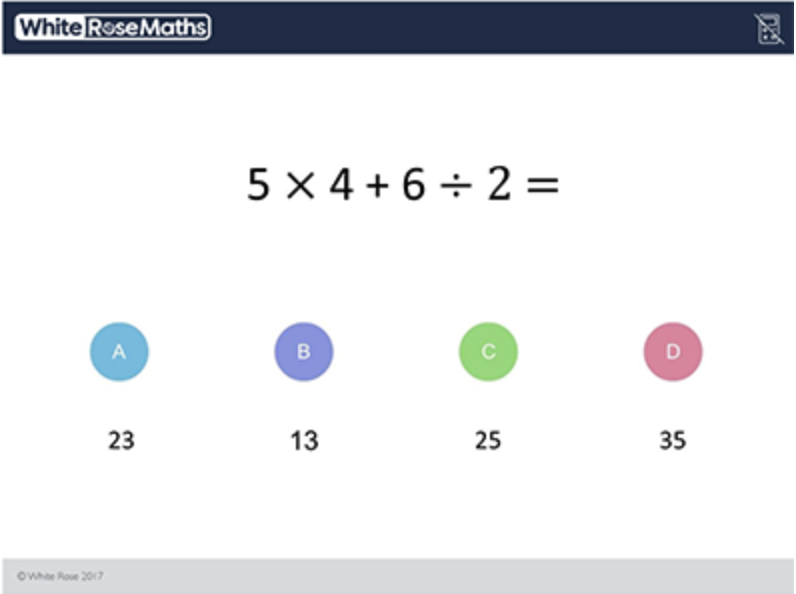

If a student selects the distractor "13," they may have the misconception "Carries out operations from left to right regardless of priority order."

Tagging distractors with appropriate misconceptions is essential but time-consuming, and it is difficult to maintain consistency across multiple human labellers. Misconceptions vary significantly in terms of description granularity, and new misconceptions are often discovered as human labellers tag distractors in new topic areas.

Initial efforts to use pre-trained language models have not been successful, likely due to the complexity of the mathematical content in the questions. Therefore, a more efficient and consistent approach is needed to streamline the tagging process and enhance the overall quality.

This competition challenges you to develop a Natural Language Processing (NLP) model driven by Machine Learning (ML) that predicts the affinity between misconceptions and distractors. The goal is to create a model that not only aligns with known misconceptions but also generalizes to new, emerging misconceptions. Such a model would assist human labelers in accurately selecting suitable misconceptions from both existing and newly identified options.

Your work could help improve the understanding and management of misconceptions, enhancing the educational experience for both students and teachers.

Eedi, alongside Vanderbilt University, and together with ​The Learning Agency Lab, an independent nonprofit based in Arizona, have collaborated with Kaggle on this competition.

# Dataset Description

On Eedi, students answer Diagnostic Questions (DQs), which are multiple-choice questions featuring one correct answer and three incorrect answers, known as distractors. Each question targets a specific construct (also referred to as a skill), representing the most granular level of knowledge relevant to the question. Each distractor is designed to correspond with a potential misconception. Below is an example of a DQ:
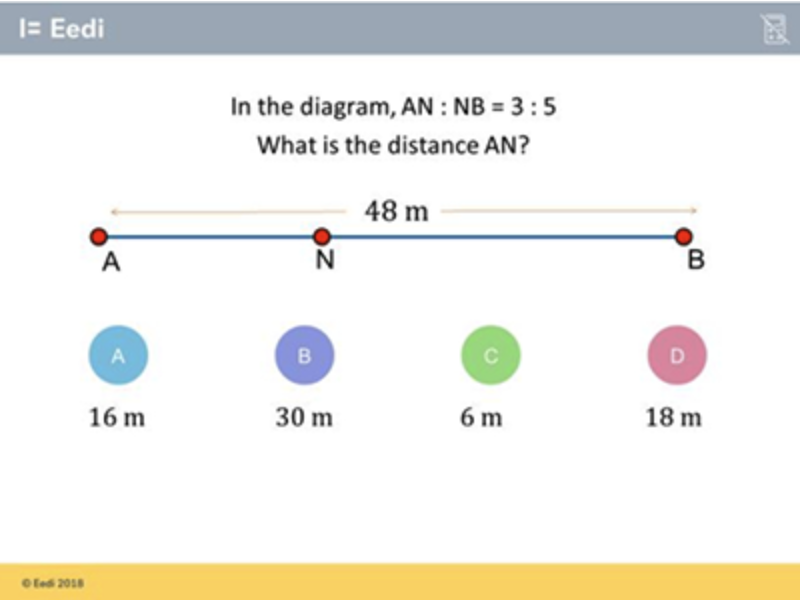

In this example, the options for the question are labeled with misconceptions as follows:

A: Divides total amount by each side of the ratio instead of dividing by the sum of the parts
B: Mixes up sides of a ratio
C: Finds one part of a ratio but doesn't multiply that by the number of parts needed
D: Correct answer
The Diagnostic Questions were originally presented in image format, and the text, including mathematical content, has been extracted using a human-in-the-loop OCR process.

File and Field Information
[train/test].csv
QuestionId - Unique question identifier (int).
ConstructId - Unique construct identifier (int) .
ConstructName - Most granular level of knowledge related to question (str).
CorrectAnswer - A, B, C or D (char).
SubjectId - Unique subject identifier (int).
SubjectName - More general context than the construct (str).
QuestionText - Question text extracted from the question image using human-in-the-loop OCR (str) .
Answer[A/B/C/D]Text - Answer option A text extracted from the question image using human-in-the-loop OCR (str).
Misconception[A/B/C/D]Id - Unique misconception identifier (int). Ground truth labels in train.csv; your task is to predict these labels for test.csv.
misconception_mapping.csv - maps MisconceptionId to its MisconceptionName
sample_submission.csv - A submission file in the correct format.
QuestionId_Answer - Each question has three incorrect answers for which need you predict the MisconceptionId.
MisconceptionId - You can predict up to 25 values, space delimited.
Please note that this is a Code Competition. The hidden test set has approximately 1,000 questions.

# Import

In [2]:
!pip3 install -q -U transformers --no-index --find-links /kaggle/input/hf-libraries/transformers

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

# Data Load

In [20]:
misconception_mapping = pd.read_csv("Downloads/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv")